# FIT5196 Task 3 in Assessment 2
#### Student Name: Siyang Feng
#### Student ID: 28246993

Date: 13/05/2018

Version: 2.0

Environment: Python 3.6.2 and Anaconda 4.3.29

Libraries used:
* pandas 0.20.3 (for data frame, included in Anaconda Python 3.6)
* numpy 1.13.1 (for data format, included in Anaconda Python 3.6)
* re 2.2.1 (for regular express, included in Anaconda Python 3.6)

## Introduction
In this task, you are required to find impute all the missing values by inspecting and analyzing the dataset3(dataset3_with_missing.csv). In the end, save the fixed table in dataset3_solution.csv.

## Import Library

In [1]:
import sys
import pandas as pd
import numpy as np
import re

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split

try:
    import seaborn as sns
    sns.set_style("whitegrid")
except:
    !pip install seaborn
    import seaborn as sns 
    sns.set_style("whitegrid")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML

D:\Users\GE62\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\GE62\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
print(sys.version_info)
print('Pandas version :', pd.__version__)
print('numpy version :', np.__version__)
print('Regular Expression version :', re.__version__)

sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)
Pandas version : 0.20.3
numpy version : 1.13.1
Regular Expression version : 2.2.1


## Import CSV Data and Check global Info

In [3]:
ds = pd.read_csv('dataset3_with_missing.csv')
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


## Check missing value

In [4]:
ds.shape

(9967, 19)

In [5]:
ds.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.967000e+03,9967,9.967000e+03,9967.000000,9567.00000,9901.000000,9.967000e+03,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9900.000000,9900.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
unique,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.582619e+09,NaN,5.292077e+05,3.360590,2.08430,2075.559135,1.475640e+04,1.480636,0.006522,0.221932,3.447677,7.667804,1788.707071,286.502626,1970.795124,88.537173,98076.508578,47.562232,-122.207991
std,2.874615e+09,NaN,3.292537e+05,0.918844,0.68647,875.594047,3.624471e+04,0.525657,0.080496,0.745250,0.670354,1.157612,803.025500,436.856021,29.212704,411.039302,53.255806,0.137256,0.142927
min,1.000102e+06,NaN,7.800000e+04,0.000000,0.00000,290.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000
25%,2.124069e+09,NaN,3.203000e+05,3.000000,1.75000,1440.000000,5.136500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.475700,-122.324000
50%,3.905040e+09,NaN,4.500000e+05,3.000000,2.25000,1950.000000,7.725000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98059.000000,47.574500,-122.221000
75%,7.304301e+09,NaN,6.400000e+05,4.000000,2.50000,2550.000000,1.084150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,560.000000,1996.000000,0.000000,98117.000000,47.679200,-122.118000


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


From the shape infomation, we can find out that the total rows is 9967. Thus, comparing with the output of `ds.info()` and its shape, we can get the columns with missing data.
##### Columns with missing values:
* bathrooms
* sqft_living      
* sqft_above       
* sqft_basement   

In [7]:
ds.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

Count missing value using `dataframe.isnull().sum()`.
* bathrooms :    400 null
* sqft_living  :    66 null
* sqft_above   :    67 null
* sqft_basement :    67 null

## Investigate missing values: 
### 1. sqft_living, sqft_above and sqft_basement value

Get dataset without missing value of sqft_living, sqft_above and sqft_basement

In [8]:
ds[ds.sqft_living.notnull() & ds.sqft_above.notnull() & ds.sqft_basement.notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 9966
Data columns (total 19 columns):
id               9767 non-null int64
date             9767 non-null object
price            9767 non-null int64
bedrooms         9767 non-null int64
bathrooms        9367 non-null float64
sqft_living      9767 non-null float64
sqft_lot         9767 non-null int64
floors           9767 non-null float64
waterfront       9767 non-null int64
view             9767 non-null int64
condition        9767 non-null int64
grade            9767 non-null int64
sqft_above       9767 non-null float64
sqft_basement    9767 non-null float64
yr_built         9767 non-null int64
yr_renovated     9767 non-null int64
zipcode          9767 non-null int64
lat              9767 non-null float64
long             9767 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.5+ MB


There must be some relationships between sqft_living, sqft_above and sqft_basement.   
* Guessing: `sqft_living = sqft_above + sqft_basement`.  
* Check guessing function.

In [9]:
ds[ds.sqft_above + ds.sqft_basement != ds.sqft_living]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
146,6666830250,20140505T000000,712198,4,2.50,2450.0,4247,2.0,0,0,3,8,NaN,0.0,2013,0,98052,47.7048,-122.113
189,1223089050,20140506T000000,280000,3,1.75,NaN,11800,1.0,0,0,4,7,1630.0,0.0,1971,0,98045,47.4863,-121.730
250,3888100043,20140507T000000,350000,3,1.00,1010.0,9360,1.0,0,0,3,6,NaN,0.0,1981,0,98033,47.6874,-122.168
326,8857600820,20140508T000000,260000,4,1.50,2130.0,8800,1.0,0,0,3,7,NaN,1030.0,1962,0,98032,47.3830,-122.288
338,923049378,20140508T000000,207000,3,1.00,1490.0,8995,1.0,0,0,4,7,NaN,0.0,1954,0,98168,47.4901,-122.303
393,5341600030,20140509T000000,255000,2,1.00,960.0,28717,1.0,0,0,4,6,NaN,0.0,1984,0,98070,47.3356,-122.502
434,1219000043,20140509T000000,315000,5,1.75,2320.0,8100,1.0,0,0,4,7,1160.0,NaN,1956,0,98166,47.4631,-122.341
483,2113700235,20140512T000000,360000,4,2.00,NaN,5500,1.0,0,0,5,7,1010.0,720.0,1943,0,98106,47.5304,-122.353
503,7203101610,20140512T000000,265000,2,1.00,1290.0,2828,2.0,0,0,3,7,1290.0,NaN,2008,0,98053,47.6968,-122.025
509,4375700065,20140512T000000,315275,3,1.75,1440.0,8040,1.0,0,0,3,7,NaN,480.0,1951,0,98125,47.7128,-122.306


We find out that all the items with function `ds.sqft_above + ds.sqft_basement != ds.sqft_living` may contains `NaN` in one of these three columns.  
To virify my guess. Find out if there is any item that has no NaN value in these three columns but follows the guessing function.

In [10]:
ds[(ds.sqft_above + ds.sqft_basement != ds.sqft_living) & (ds.sqft_living.notnull() & ds.sqft_above.notnull() & ds.sqft_basement.notnull())]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


From the above result, we find out that all the items in these three columns follows the guessing function. Thus, we can use this funtion to fill lthe reasonable values.
#### Fill the NaN values in column `sqft_living`
    - This step, we can only fill the `sqft_living` items with not NaN in other two columns.
    - Then, we should check if there is any items that not only the `sqft_living` is NaN and find other way to fill it.

In [11]:
# fill the sqft_living items without NaN in other two columns.
indexs = ds[ds.sqft_living.isnull() & ds.sqft_above.notnull() & ds.sqft_basement.notnull()].index
for i in indexs:
    ds.at[i, 'sqft_living'] = ds.loc[i].sqft_above + ds.loc[i].sqft_basement

In [12]:
# check NaN
ds[ds.sqft_living.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


From the above result, we find out that all the NaN values in `sqft_living` column are all fill in reasonable and no NaN value left.  
Fill the other two columns with the same logic as above.
#### Fill the NaN values in column `sqft_above	`

In [13]:
ds[ds.sqft_above.isnull() & ds.sqft_basement.notnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
146,6666830250,20140505T000000,712198,4,2.5,2450.0,4247,2.0,0,0,3,8,NaN,0.0,2013,0,98052,47.7048,-122.113
250,3888100043,20140507T000000,350000,3,1.0,1010.0,9360,1.0,0,0,3,6,NaN,0.0,1981,0,98033,47.6874,-122.168
326,8857600820,20140508T000000,260000,4,1.5,2130.0,8800,1.0,0,0,3,7,NaN,1030.0,1962,0,98032,47.3830,-122.288
338,923049378,20140508T000000,207000,3,1.0,1490.0,8995,1.0,0,0,4,7,NaN,0.0,1954,0,98168,47.4901,-122.303
393,5341600030,20140509T000000,255000,2,1.0,960.0,28717,1.0,0,0,4,6,NaN,0.0,1984,0,98070,47.3356,-122.502


In [14]:
# fill the sqft_above items 
indexs = ds[ds.sqft_above.isnull() & ds.sqft_basement.notnull()].index
for i in indexs:
    ds.at[i, 'sqft_above'] = ds.loc[i].sqft_living - ds.loc[i].sqft_basement

In [15]:
ds[ds.sqft_above.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


#### Fill the NaN values in column `sqft_basement`

In [16]:
ds[ds.sqft_basement.isnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
434,1219000043,20140509T000000,315000,5,1.75,2320.0,8100,1.0,0,0,4,7,1160.0,NaN,1956,0,98166,47.4631,-122.341
503,7203101610,20140512T000000,265000,2,1.00,1290.0,2828,2.0,0,0,3,7,1290.0,NaN,2008,0,98053,47.6968,-122.025
514,3674400035,20140512T000000,156000,3,1.00,970.0,8580,1.0,0,0,3,7,970.0,NaN,1959,0,98003,47.3363,-122.311
953,8594400350,20140520T000000,315000,3,2.25,1400.0,31626,1.0,0,0,2,7,1140.0,NaN,1987,0,98092,47.3029,-122.069
956,8819900270,20140520T000000,440000,2,1.75,1300.0,4000,2.0,0,0,3,7,1300.0,NaN,1948,0,98105,47.6687,-122.288


In [17]:
# fill the sqft_basement items 
indexs = ds[ds.sqft_basement.isnull()].index
for i in indexs:
    ds.at[i, 'sqft_basement'] = ds.loc[i].sqft_living - ds.loc[i].sqft_above

In [18]:
ds[ds.sqft_basement.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


* Check values in these three columns together.

In [19]:
# Check NaN
ds[ds.sqft_living.isnull() | ds.sqft_above.isnull() | ds.sqft_basement.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [20]:
# Check ds.sqft_above + ds.sqft_basement != ds.sqft_living
ds[ds.sqft_above + ds.sqft_basement != ds.sqft_living]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


Columns sqft_living, sqft_above and sqft_basement are are filled reasonablely. Next step is to fill missing `bathrooms` value.
### 2. `bathrooms` value
Bathrooms is not influenced by itself. It is influenced by multiple factors.
In this situation, we will consider to use linear regression to solve this problem. The data will be divided into training and testing subsets after drop the items `bathrooms = NaN`. Using the trained model to predict the missing value.
* The key points of this task is to find out the best linear regression model.

#### drop NaN rows

In [21]:
ds_dropna = ds.dropna(subset=['bathrooms'], axis=0).copy(deep=True)
ds_dropna.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [22]:
ds_dropna.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [23]:
ds_dropna.bathrooms.describe()

count    9567.00000
mean        2.08430
std         0.68647
min         0.00000
25%         1.75000
50%         2.25000
75%         2.50000
max         4.50000
Name: bathrooms, dtype: float64

After the NaN values in bathrooms dropped, the new dataset contains no NaN values.

#### Plot relations about bathrooms and other factors
This step is to find out which factors will influence the number of bathrooms.

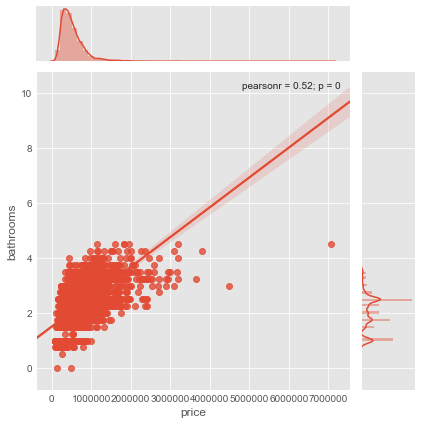

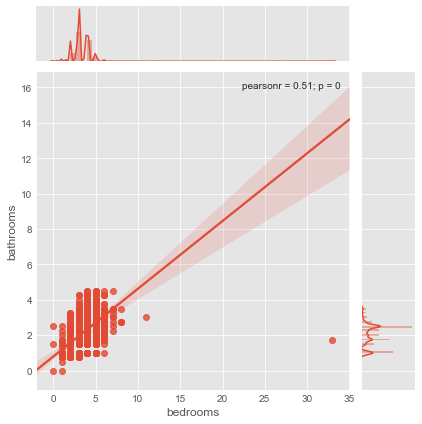

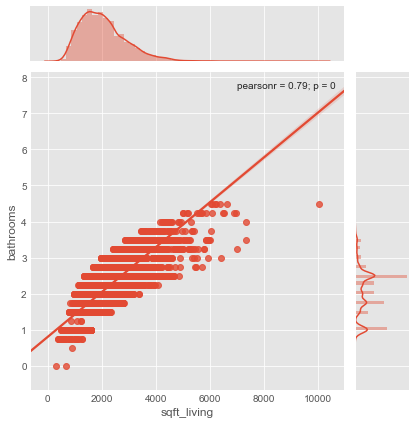

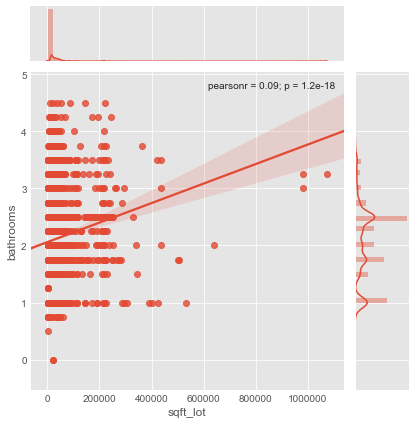

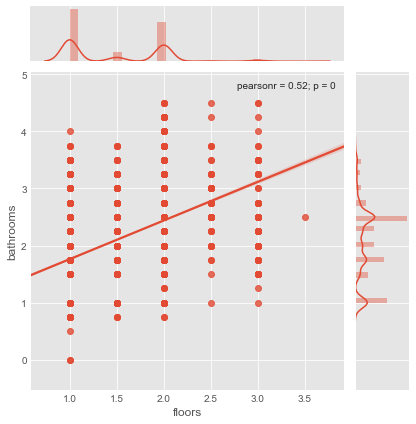

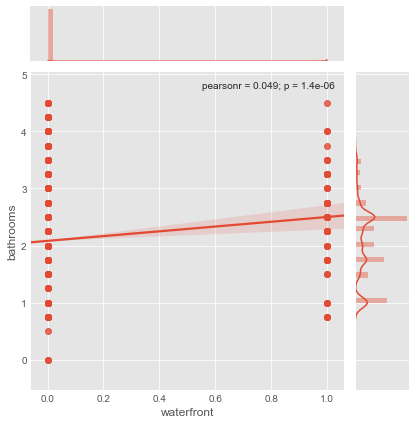

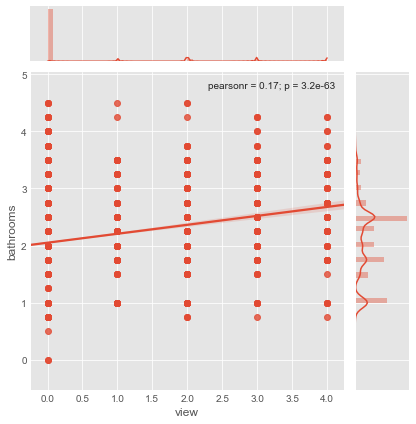

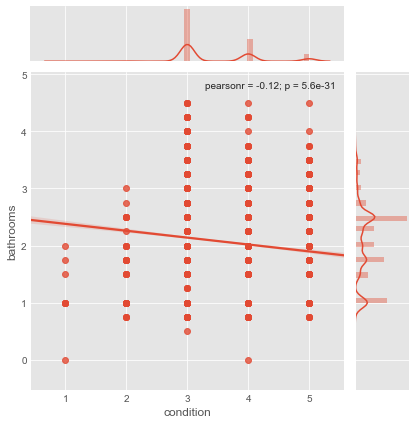

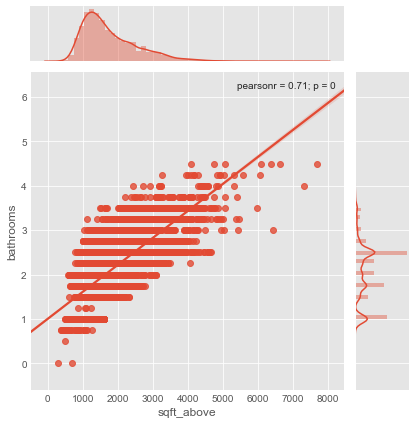

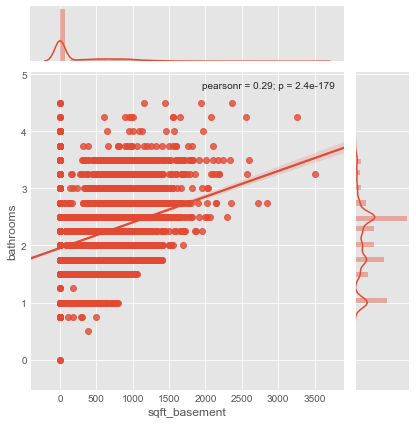

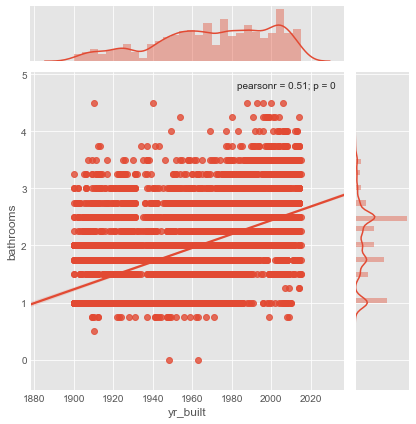

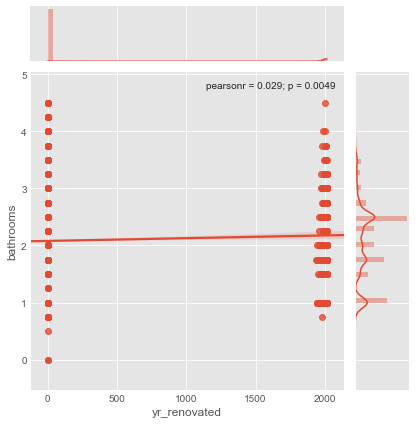

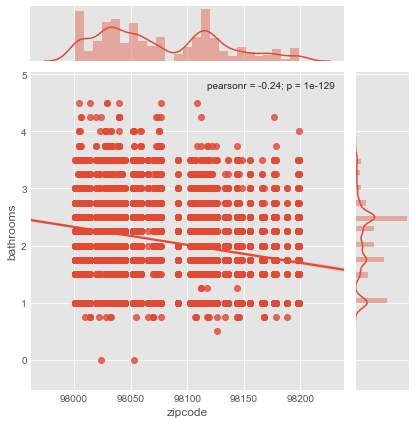

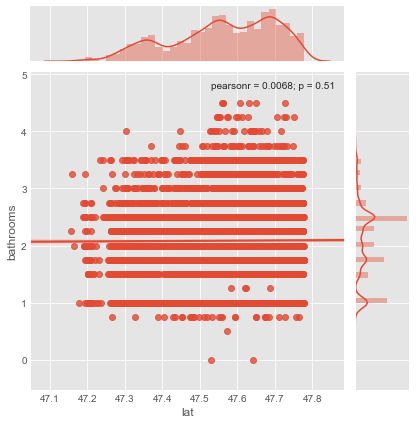

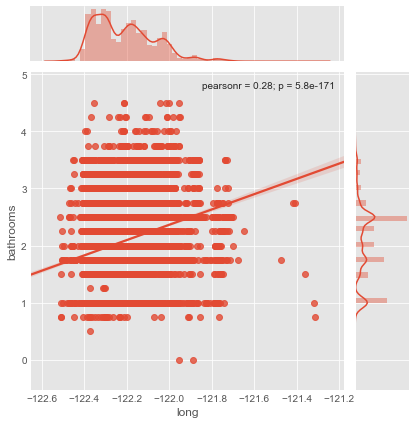

In [24]:
sns.jointplot(x = 'price', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'bedrooms', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'sqft_living', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'sqft_lot', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'floors', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'waterfront', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'view', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'condition', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'sqft_above', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'sqft_basement', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'yr_built', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'yr_renovated', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'zipcode', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'lat', y = 'bathrooms', data = ds_dropna, kind = 'reg')
sns.jointplot(x = 'long', y = 'bathrooms', data = ds_dropna, kind = 'reg')
plt.show()

From the graph above, we can find out that which column may have relations with bathrooms.

#### Divided data into features and labels
Only four columns can be seen as features to influence bathrooms

In [25]:
bathroom = ds_dropna.bathrooms
bathroom.head()

0    1.50
1    2.50
2    2.00
3    2.25
4    2.50
Name: bathrooms, dtype: float64

In [26]:
#feature_list = ['price', 'bedrooms', 'sqft_living', 'floors', 'yr_built', 'yr_renovated']#, 'sqft_above']#, 'yr_renovated']
feature_list = ['price', 'bedrooms', 'sqft_living', 'floors', 'yr_built', 'yr_renovated', 'yr_built', 'sqft_above', 'sqft_basement', 'grade', 'condition']
features = ds_dropna[feature_list]
features.head()

,price,bedrooms,sqft_living,floors,yr_built,yr_renovated,yr_built,sqft_above,sqft_basement,grade,condition
0,313000,3,1340.0,1.5,1955,0,1955,1340.0,0.0,7,3
1,2384000,5,3650.0,2.0,1921,0,1921,3370.0,280.0,10,5
2,342000,3,1930.0,1.0,1966,0,1966,1930.0,0.0,8,4
3,420000,3,2000.0,1.0,1963,0,1963,1000.0,1000.0,8,4
4,550000,4,1940.0,1.0,1976,0,1976,1140.0,800.0,7,4


In [27]:
features.shape

(9567, 11)

#### Shuffle and Splite data into test and training datasets
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `bathroom` data into training and testing sets.
  - Split the data into 80% for training and 20% for testing.
  - Set the `random_state` for `train_test_split` to 42 which ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, bathroom, test_size=0.20, random_state=42)

In [29]:
def R2_score(y_true, y_predict):
    """ 
    Calculate the R2 score to test ferformance of model
    Good model: R2 score -> 1
    bad model: R2 score -> 0
    
    Arguments:
    y_true -- the real bathroom value
    y_predict -- the predict bathroom value
    
    Return:
    score -- R2 score
    """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    return score

In [30]:
def fit_linear_model(X, y):
    """
    Define a fitting model.
    grid search is used to select a best parameter with the regression depth.
    Linear regression
    
    Arguements:
    X -- features for training
    y -- actrual result of bathrooms
    
    Return:
    best_est -- the best estimator
    """
    # perform cross validation
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # Create a linear regression object
    linear_reg = LinearRegression()
    
    # Create a dictionary for the parameter 'reg_depth' with the range from 1 to 10
    params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'n_jobs':[-1]}
    
    # Transfer function 'R2_score' into score function with function 'make scorer'
    score_func = make_scorer(R2_score)
    
    # Make a grid search object to find out the best parameter
    grid_obj = GridSearchCV(linear_reg, param_grid=params, scoring=score_func, cv=cv_sets)
    grid = grid_obj.fit(X, y)
    
    best_est = grid.best_estimator_
    
    return best_est

In [31]:
# get the best parameters
# Get Optimal Model
lin_best = fit_linear_model(X_train, y_train)
lin_best

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [32]:
y_lin_predict = lin_best.predict(X_test)
R2_score(y_test, y_lin_predict)

0.75071783952967275

In [33]:
# Linear regression without grid search
lin_gre = LinearRegression()
lin_gre.fit(X_train, y_train)
y_l_predict = lin_gre.predict(X_test)
R2_score(y_test, y_l_predict)

0.75071783952967452

In [34]:
def fit_tree_model(X, y):
    """
    Define a fitting model.
    grid search is used to select a best parameter with the regression depth.
    decision tree
    
    Arguements:
    X -- features for training
    y -- actrual result of bathrooms
    
    Return:
    best_est -- the best estimator
    """
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10,test_size = 0.20, random_state = 0)

    tree_reg = DecisionTreeRegressor(random_state=0)

    params = {'max_depth': list(range(1,11))}

    scoring_fnc = make_scorer(R2_score)

    grid_obj = GridSearchCV(tree_reg, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid_obj.fit(X, y)

    best_est = grid.best_estimator_
    return grid.best_estimator_

In [35]:
reg_best_t = fit_tree_model(X_train, y_train)
reg_best_t

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [36]:
y_predict_t = reg_best_t.predict(X_test)
R2_score(y_test, y_predict_t)

0.77061316674926272

In [37]:
def fit_rf_model(X, y):
    """
    Define a fitting model.
    grid search is used to select a best parameter with the regression depth.
    Random forest
    
    Arguements:
    X -- features for training
    y -- actrual result of bathrooms
    
    Return:
    best_est -- the best estimator
    """
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10,test_size = 0.20, random_state = 0)

    tree_reg = RandomForestRegressor(random_state=0)

    params = {'n_estimators': [3000],
             'max_depth':[8],
             'min_samples_split':[25],
             'min_samples_leaf':[5],
             'max_leaf_nodes':[200],
             'min_weight_fraction_leaf':[0],
             'random_state':[55],
             'n_jobs':[-1]}

    scoring_fnc = make_scorer(R2_score)

    grid_obj = GridSearchCV(tree_reg, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid_obj.fit(X, y)

    best_est = grid.best_estimator_
    return grid.best_estimator_

In [38]:
reg_best_rf = fit_rf_model(X_train, y_train)
reg_best_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=200,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=25,
           min_weight_fraction_leaf=0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=55, verbose=0, warm_start=False)

In [39]:
y_pre_rf = reg_best_rf.predict(X_test)
R2_score(y_test, y_pre_rf)

0.8003993522682632

Three models are training: `linear regression`, `decision tree` and `Random Forest`. With teasting group of different parameters, we find out that Random Forest regression model always has a better result than linear regression model and decision tree model. Moreover, R2 score can achieve 80% which should be reliable repdict. Thus, we decided to use Random Forest Regression model to predict missing data.  
When the feature group is `['price', 'bedrooms', 'sqft_living', 'floors', 'yr_built', 'yr_renovated', 'yr_built', 'sqft_above', 'sqft_basement', 'grade', 'condition']`, Random Forest will get a better model with R2 score, 0.8004.
#### Fill the missing bathrooms with trained model

In [40]:
# define a quarter value function
def round_partial(value, resolution):
    return round(value * resolution) / resolution

In [41]:
# predict result and quarter the result
# get feature_list = ['price', 'bedrooms', 'sqft_living', 'floors', 'yr_built', 
#                    'yr_renovated', 'yr_built', 'sqft_above', 'sqft_basement', 
#                    'grade', 'condition']
ds_na_bath = ds[ds.bathrooms.isnull()]
predict_result = reg_best_rf.predict(ds_na_bath[feature_list])
quarter_predict = []
for i in predict_result:
    quarter_predict.append(round_partial(i, 4))

quarter_predict[:10]

[2.25, 2.25, 1.0, 2.5, 2.75, 2.25, 1.25, 1.5, 1.75, 1.75]

In [42]:
#ds_na_bath = ds[ds.bathrooms.isnull()]
for i, bath_number in enumerate(quarter_predict):
    ds.at[ds_na_bath.index[i], 'bathrooms'] = bath_number

In [43]:
# check null value
ds[ds.isnull().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


## Export dataframe
Set column of `'id'` as index.

In [44]:
ds = ds.set_index(ds['id'].values)
ds.index.name = 'id'
ds.drop('id', 1, inplace=True)
ds.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [45]:
ds.to_csv('dataset3_solution.csv', encoding = 'utf-8')

## Summary

There are four columns contains missing value. There are two kind of ways to fix the missing value:
1. use straight relationship between some columns and do some simple operation to calculate the missing value.
2. There are some relations between missing value and other columns. But the relationship is not such obvious. Thus, we have to guess the missing value.

* Machine learning is suitable for this situation. The key points for machine learning are:
    - determine what kind of algorithm should we need (supervised, unsupervised or reinforcement learning). In this task, we use supervised algorithm to solve this problem. Because in this task, we can regard the data without missing value as tainning and testing dataset to predict missing value.
    - What kind of model should we select (regression model or classifier model). In this task, we use regression model to predict.
    - Which model should we choose (linear, decision tree, random forest and so on). In this task, we choose rendom forest to solve this problem. Because it has higher score than other two model.
    - It is important to adjust parameters. A good parameter can increase the accuracy of the model. And it's also a time consuming task. In this task, I use grid search to adjust parameters.
    - Choose a good features is also important in model training.